In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
model = keras.models.load_model('unet4_runs.h5')
# model = keras.models.load_model('unet4_runs_1.h5')
# model = keras.models.load_model('unet_aws_70_second_run.h5')
# model = keras.models.load_model('unet5.h5')

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 16) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [7]:
image_path = os.listdir('Images/')

In [8]:
image_path

['boat.jpg',
 'building.jpg',
 'can.jpg',
 'car.jpg',
 'castle.jpg',
 'city.jpg',
 'dog.jpg',
 'giraffe.jpg',
 'ice.jpg',
 'ice_big.jpeg',
 'IMG_3277.JPG',
 'ishaan.jpg',
 'lamp.jpg',
 'motor.jpg',
 'person.jpg',
 'person_background.png',
 'reef.jpg',
 'reef_2.jpg',
 'selfie.jpg',
 'shift_1.JPG',
 'shift_3.JPG',
 'shift_test_2.JPG',
 'tiger.jpeg']

1.0


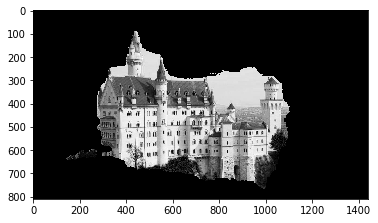

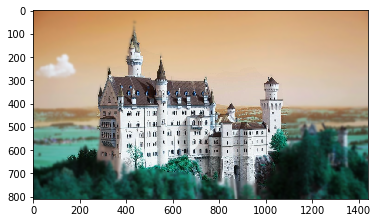

True

In [45]:
image = 'castle.jpg'

original = cv2.imread(os.path.join('Images/' + image))

img = cv2.resize(cv2.cvtColor(original, cv2.COLOR_BGR2GRAY), dsize=(256, 256), interpolation=cv2.INTER_CUBIC)

img = img / 255




print(np.max(img))

result = model.predict(img.reshape(-1,256,256,1))



mask = np.where(result.reshape(256, 256) > 0.1, 1, 0).astype('uint8')


kernel = np.array([[0, 1, 1, 1, 0],
				   [1, 1, 1, 1, 1],
				   [1, 1, 1, 1, 1],
				   [1, 1, 1, 1, 1],
				   [0, 1, 1, 1, 0]], dtype = 'uint8')


dilate = cv2.dilate(mask, kernel, iterations = 1)
dilate2 = cv2.dilate(dilate, kernel, iterations = 1)
dilate3 = cv2.dilate(dilate2, kernel, iterations = 1)
dilate4 = cv2.dilate(dilate3, kernel, iterations = 1)
dilate5 = cv2.dilate(dilate4, kernel, iterations = 1)
dilate6 = cv2.dilate(dilate5, kernel, iterations = 1)




o_mask = cv2.resize(mask, dsize=(original.shape[1], original.shape[0]), interpolation=cv2.INTER_CUBIC)

gauss = cv2.GaussianBlur(original,(23,23),cv2.BORDER_DEFAULT)

plt.imshow(np.where(o_mask, original[:,:,0], 0), cmap=plt.get_cmap('gray'))
plt.show()




final_image_b = np.where(o_mask, original[:,:,0], gauss[:,:,0])
final_image_g = np.where(o_mask, original[:,:,1], gauss[:,:,1])
final_image_r = np.where(o_mask, original[:,:,2], gauss[:,:,2])


final_colorized = cv2.merge([final_image_b,final_image_g,final_image_r])

plt.imshow(final_colorized, cmap=plt.get_cmap('gray'))
plt.show()


cv2.imwrite('test.png', final_colorized)